Comparing Contacts Binaries in PHOEBE 2 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed and manually install the python wrappers in the `phoebe-py` directory.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
b['q'] = 0.7

Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

Now we add compute options for the 'legacy' backend.

In [4]:
b.add_compute('legacy')

<ParameterSet: 11 parameters | datasets: lc01, rv01>

Let's use the external atmospheres available for both phoebe1 and phoebe2

In [5]:
b.set_value_all('atm', 'extern_planckint')

Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAM

Set value of gridsize for the trapezoidal (WD) mesh.

In [6]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [7]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@lc01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@rv01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@rv01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAMETERS   WARNING ld_func='interp' only supported by atm='ck2004'.  Either change atm@primary or ld_func@primary@rv01  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Mon, 29 Oct 2018 10:10 PARAM

Finally, let's compute our models

In [8]:
b.run_compute(kind='phoebe', model='phoebe2model', irrad_method='none')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [9]:
b.run_compute(kind='legacy', model='phoebe1model', irrad_method='none')

Mon, 29 Oct 2018 10:10 IO           WARNING requiv_max@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING requiv_min@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING freq@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING pitch@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING yaw@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING long_an@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING irrad_frac_lost_bol@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING ld_func_bol@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING mass@primary@star@component has no phoebe 1 corollary
Mon, 29 Oct 2018 10:10 IO           WARNING requiv_max@secondary@star@component h

<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

### Light Curve

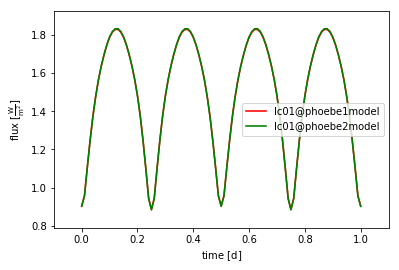

In [10]:
afig, mplfig = b.filter(dataset='lc01').plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                                             legend=True, show=True)

Now let's plot the residuals between these two models

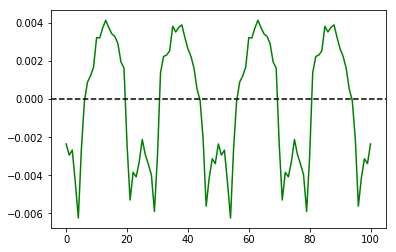

In [11]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

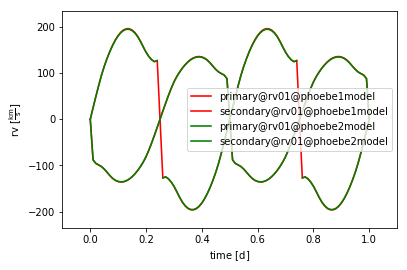

In [12]:
afig, mplfig = b['rv01'].plot(c={'phoebe2model': 'g', 'phoebe1model': 'r'}, linestyle='solid', 
                              legend=True, show=True)

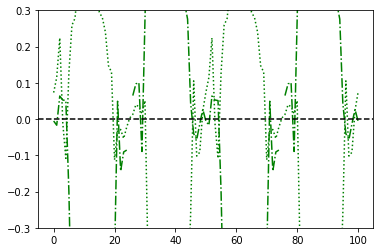

In [13]:
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)